In [1]:
import pandas as pd
from matplotlib import pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-7lox8p7p because the default path (/home/jedrz/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
df = pd.read_csv('./data/yoga_ds_Xy.csv')
df.head()

,pose,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,hanumanasana,0.261698,0.512255,0.237344,0.517355,0.238441,0.486026,0.242483,0.497878,0.248089,...,0.651845,0.414223,0.678855,0.221365,0.722782,0.674401,0.683820,0.050615,0.795440,0.924660
1,hanumanasana,0.394864,0.491497,0.370693,0.487102,0.375714,0.461120,0.381811,0.450995,0.400140,...,0.807697,0.396388,0.854739,0.710447,0.805349,0.174530,0.908731,0.943022,0.702517,0.003883
2,hanumanasana,0.430713,0.753430,0.439265,0.780632,0.419011,0.763575,0.482887,0.787360,0.431683,...,0.622483,0.486750,0.743239,0.589924,0.719260,0.579058,0.728648,0.731057,0.723543,0.732710
3,hanumanasana,0.369197,0.440116,0.368485,0.460600,0.366005,0.458955,0.407975,0.471238,0.402241,...,0.778978,0.435595,0.848863,0.726469,0.786196,0.241361,0.854160,0.963011,0.808341,0.036816
4,hanumanasana,0.262922,0.548760,0.245587,0.531681,0.244322,0.532350,0.257699,0.483209,0.258080,...,0.624212,0.459428,0.690590,0.708224,0.755988,0.298930,0.741362,0.910159,0.699116,0.092350


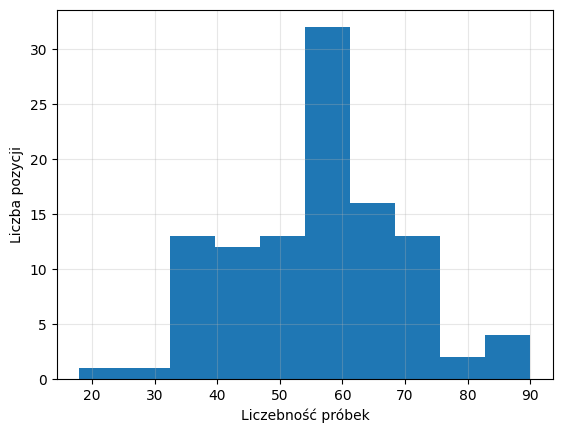

In [3]:
df["pose"].value_counts(sort=False).plot(kind="hist")
plt.xlabel("Liczebność próbek")
plt.ylabel("Liczba pozycji")
plt.grid(alpha=0.3)
plt.show()

In [4]:
metrics_df = pd.read_csv("./results/baseline_clfs_cv_metrics.csv")
metrics_df.head()

,Model,Pose,CvFold,F1,Precision,Recall,Support
0,AdaBoostClassifier,_overall,0,0.040033,0.040033,0.040033,NaN
1,AdaBoostClassifier,_overall,4,0.043406,0.043406,0.043406,NaN
2,AdaBoostClassifier,_overall,1,0.047540,0.047540,0.047540,NaN
3,AdaBoostClassifier,_overall,3,0.050876,0.050876,0.050876,NaN
4,AdaBoostClassifier,_overall,2,0.051710,0.051710,0.051710,NaN


## Micro F1

> *Micro F1 score often doesn't return an objective measure of model performance when the classes are imbalanced, whilst macro F1 score is able to do so.*

In [5]:
metrics_df[metrics_df.Pose == "_overall"].groupby("Model").F1.mean().sort_values(ascending=False)

Model
RandomForestClassifier           0.714382
KNeighborsClassifier             0.711210
SVC                              0.697361
MLPClassifier                    0.694359
GaussianNB                       0.584252
QuadraticDiscriminantAnalysis    0.536702
DecisionTreeClassifier           0.507341
AdaBoostClassifier               0.046713
Name: F1, dtype: float64

## Macro F1

In [6]:
metrics_df[metrics_df.Pose != "_overall"].groupby("Model").F1.mean().sort_values(ascending=False)

Model
KNeighborsClassifier             0.693011
RandomForestClassifier           0.692972
MLPClassifier                    0.671769
SVC                              0.661558
GaussianNB                       0.556521
DecisionTreeClassifier           0.489673
QuadraticDiscriminantAnalysis    0.457624
AdaBoostClassifier               0.012591
Name: F1, dtype: float64

In [13]:
metrics_df[metrics_df.Pose != "_overall"].groupby("Model").F1.mean().std()

0.22860314343249086

In [7]:
from scipy.stats import ttest_rel
import matplotlib.patches as mpatches
import numpy as np

In [8]:
def ttest_compare_models(model1_name, model2_name, metric_colname="F1", average="macro"):
    model1_color = "royalblue"
    model1_meancolor = "blue"
    model2_color = "orange"
    model2_meancolor = "darkorange"
    linestyle = "--"

    global metrics_df
    if average == "macro":
        _metrics_df = metrics_df[~metrics_df.Pose.str.contains("_overall")].copy()
    elif average == "micro":
        _metrics_df = metrics_df[metrics_df.Pose.str.contains("_overall")].copy()

    model1_mean_f1 = _metrics_df[_metrics_df.Model == model1_name][metric_colname].mean()
    _metrics_df[_metrics_df.Model == model1_name][metric_colname].plot(kind="hist", color=model1_color, alpha=0.4)

    model2_mean_f1 = _metrics_df[_metrics_df.Model == model2_name][metric_colname].mean()
    _metrics_df[_metrics_df.Model == model2_name][metric_colname].plot(kind="hist", color=model2_color, alpha=0.7)

    plt.axvline(model1_mean_f1, color=model1_meancolor, linestyle=linestyle)
    plt.axvline(model2_mean_f1, color=model2_meancolor, linestyle=linestyle)

    color_patch1 = mpatches.Patch(color=model1_color, label=f"{model1_name} (mean={model1_mean_f1:.4f})")
    color_patch2 = mpatches.Patch(color=model2_color, label=f"{model2_name} (mean={model2_mean_f1:.4f})")

    plt.legend(handles=[color_patch1, color_patch2])
    plt.ylabel("Frequency")
    plt.xlabel(f"{average.capitalize()} {metric_colname}")
    plt.gca().xaxis.set_ticks(np.arange(0, 1.1, 0.1))
    plt.grid(alpha=0.3)
    plt.show()

    ttest = ttest_rel(
        _metrics_df[_metrics_df.Model == model1_name].F1,
        _metrics_df[_metrics_df.Model == model2_name].F1
    )
    print((
        f" {model1_name} vs {model2_name} on {metric_colname} ".center(80, "-") + "\n"
        f"t-Student: {ttest.statistic:.6f}\n"
        f"p-value: {ttest.pvalue:.6f}"
    ))

## Comparison on the basis of Macro **F1** score

In [9]:
models_to_compare = ["RandomForestClassifier", "SVC", "KNeighborsClassifier", "MLPClassifier"]

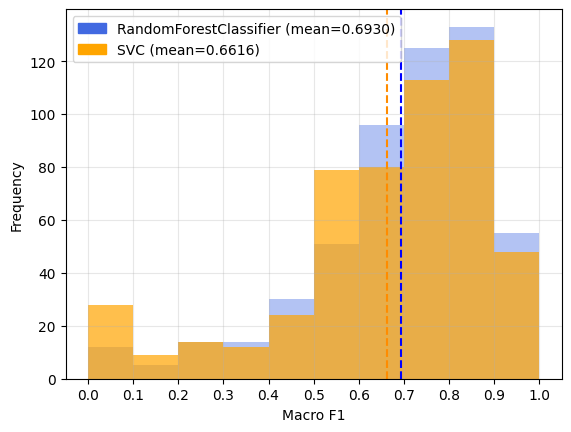

--------------------- RandomForestClassifier vs SVC on F1 ----------------------
t-Student: 5.049294
p-value: 0.000001

********************************************************************************



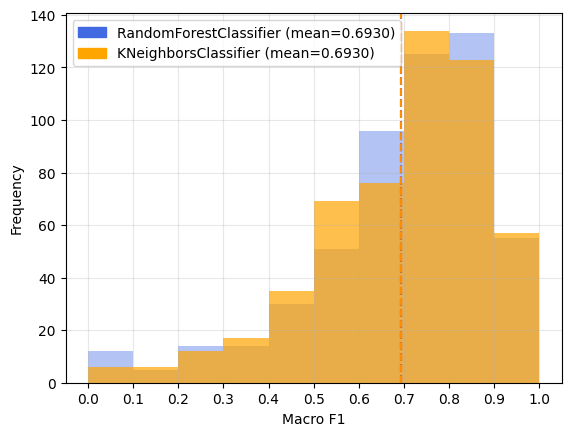

------------- RandomForestClassifier vs KNeighborsClassifier on F1 -------------
t-Student: -0.009862
p-value: 0.992135

********************************************************************************



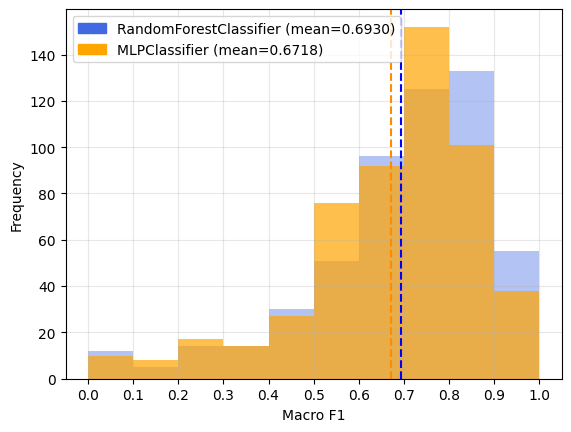

---------------- RandomForestClassifier vs MLPClassifier on F1 -----------------
t-Student: 4.733441
p-value: 0.000003

********************************************************************************



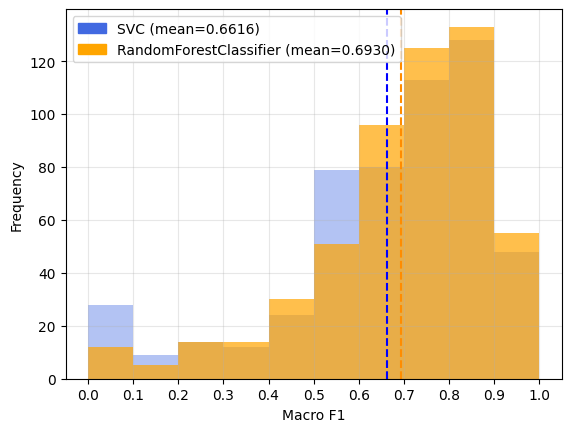

--------------------- SVC vs RandomForestClassifier on F1 ----------------------
t-Student: -5.049294
p-value: 0.000001

********************************************************************************



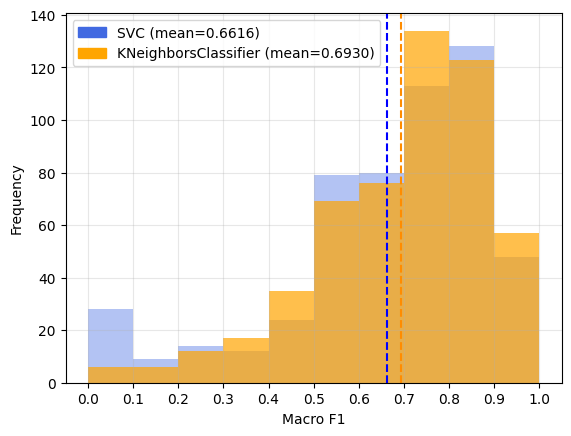

---------------------- SVC vs KNeighborsClassifier on F1 -----------------------
t-Student: -5.614980
p-value: 0.000000

********************************************************************************



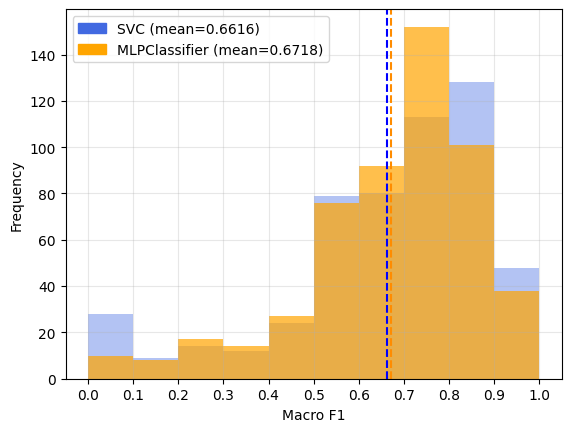

-------------------------- SVC vs MLPClassifier on F1 --------------------------
t-Student: -1.662318
p-value: 0.097036

********************************************************************************



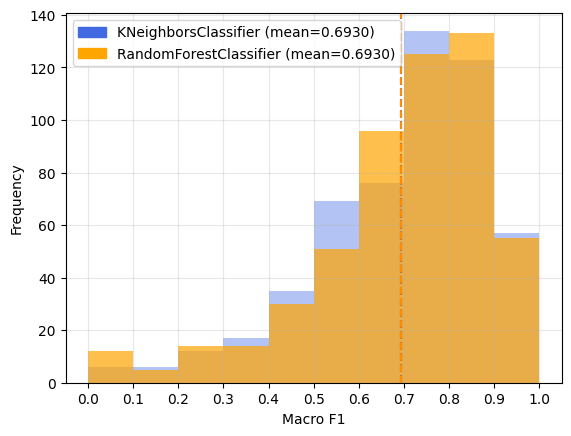

------------- KNeighborsClassifier vs RandomForestClassifier on F1 -------------
t-Student: 0.009862
p-value: 0.992135

********************************************************************************



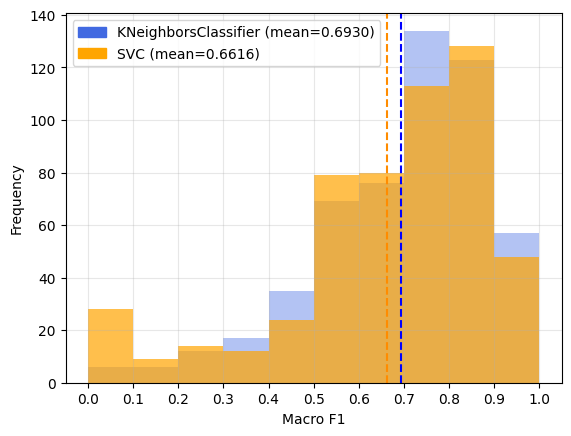

---------------------- KNeighborsClassifier vs SVC on F1 -----------------------
t-Student: 5.614980
p-value: 0.000000

********************************************************************************



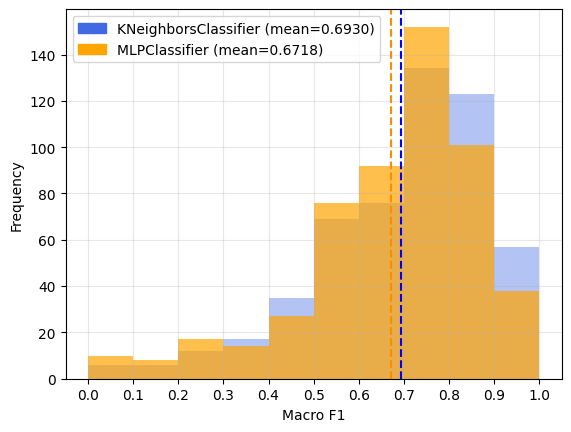

----------------- KNeighborsClassifier vs MLPClassifier on F1 ------------------
t-Student: 5.225434
p-value: 0.000000

********************************************************************************



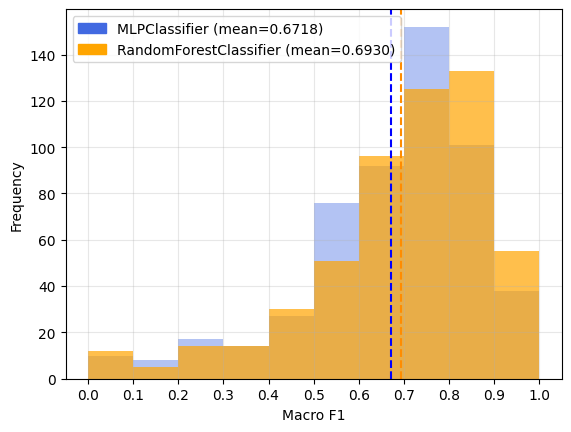

---------------- MLPClassifier vs RandomForestClassifier on F1 -----------------
t-Student: -4.733441
p-value: 0.000003

********************************************************************************



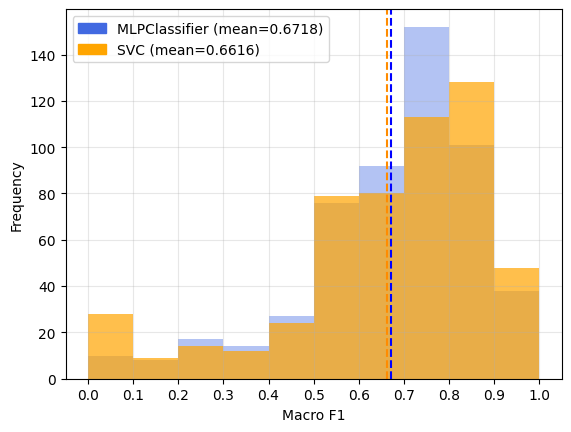

-------------------------- MLPClassifier vs SVC on F1 --------------------------
t-Student: 1.662318
p-value: 0.097036

********************************************************************************



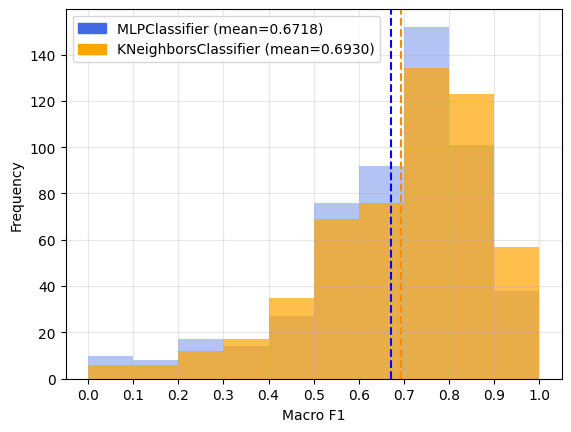

----------------- MLPClassifier vs KNeighborsClassifier on F1 ------------------
t-Student: -5.225434
p-value: 0.000000

********************************************************************************



In [10]:
for model_name1 in models_to_compare:
    for model_name2 in models_to_compare:
        if model_name1 == model_name2:
            continue
        ttest_compare_models(model_name1, model_name2, metric_colname="F1", average="macro")
        print("\n" + "*"*80 + "\n")

## Comparison on the basis of Macro **Recall** score

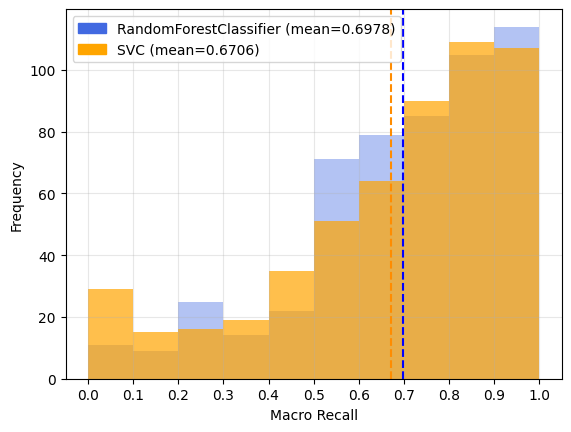

------------------- RandomForestClassifier vs SVC on Recall --------------------
t-Student: 5.049294
p-value: 0.000001

********************************************************************************



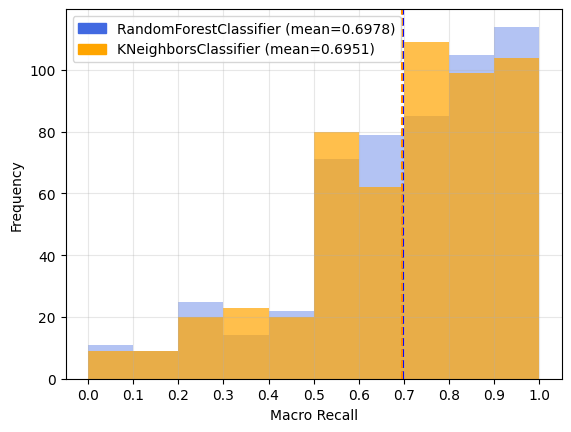

----------- RandomForestClassifier vs KNeighborsClassifier on Recall -----------
t-Student: -0.009862
p-value: 0.992135

********************************************************************************



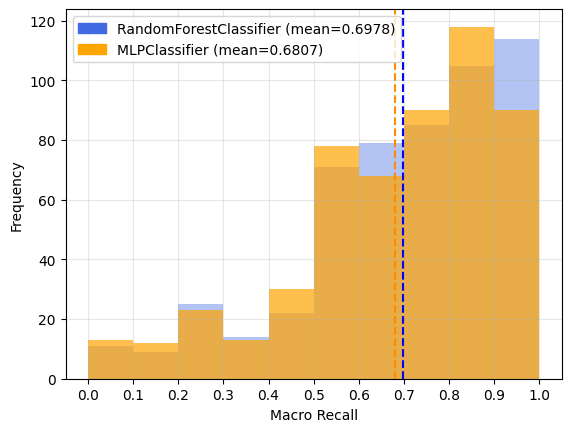

-------------- RandomForestClassifier vs MLPClassifier on Recall ---------------
t-Student: 4.733441
p-value: 0.000003

********************************************************************************



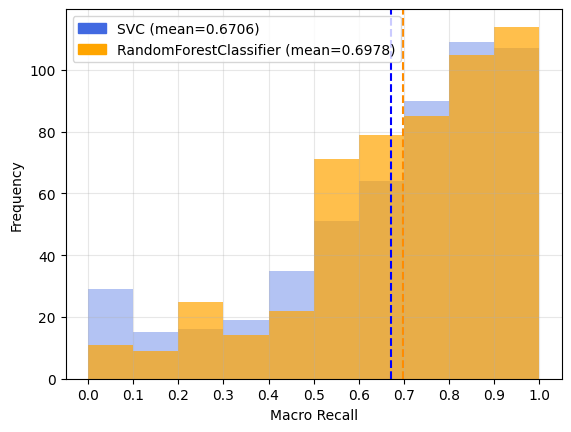

------------------- SVC vs RandomForestClassifier on Recall --------------------
t-Student: -5.049294
p-value: 0.000001

********************************************************************************



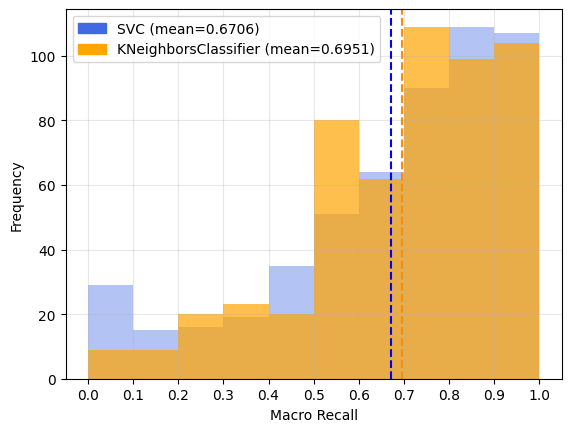

-------------------- SVC vs KNeighborsClassifier on Recall ---------------------
t-Student: -5.614980
p-value: 0.000000

********************************************************************************



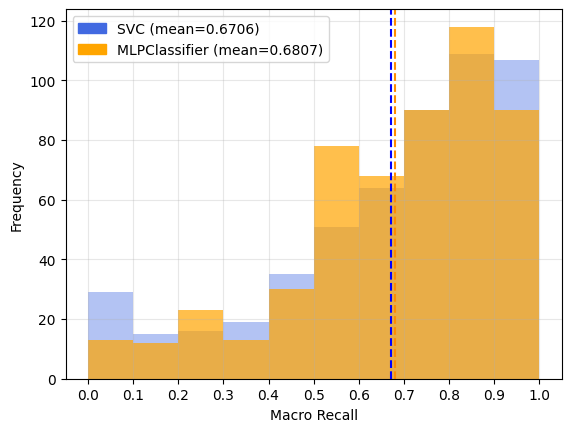

------------------------ SVC vs MLPClassifier on Recall ------------------------
t-Student: -1.662318
p-value: 0.097036

********************************************************************************



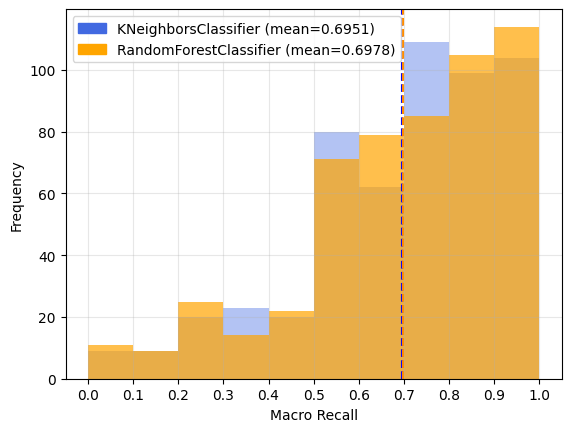

----------- KNeighborsClassifier vs RandomForestClassifier on Recall -----------
t-Student: 0.009862
p-value: 0.992135

********************************************************************************



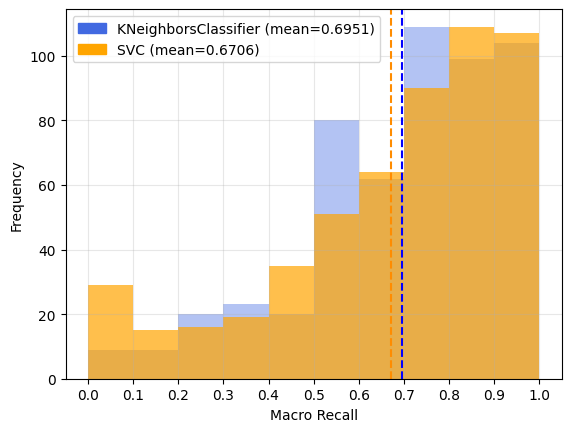

-------------------- KNeighborsClassifier vs SVC on Recall ---------------------
t-Student: 5.614980
p-value: 0.000000

********************************************************************************



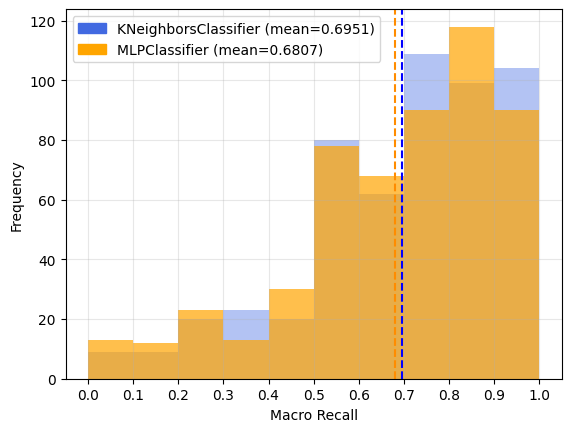

--------------- KNeighborsClassifier vs MLPClassifier on Recall ----------------
t-Student: 5.225434
p-value: 0.000000

********************************************************************************



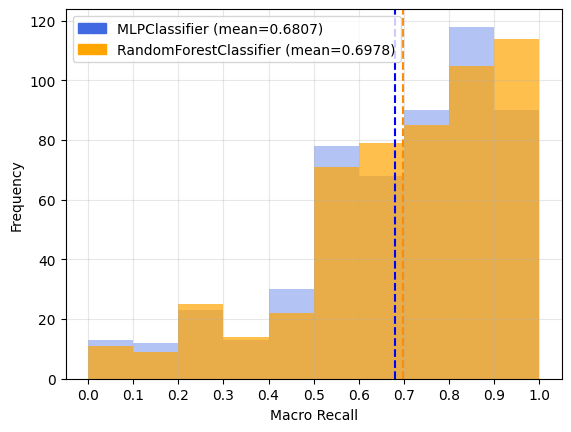

-------------- MLPClassifier vs RandomForestClassifier on Recall ---------------
t-Student: -4.733441
p-value: 0.000003

********************************************************************************



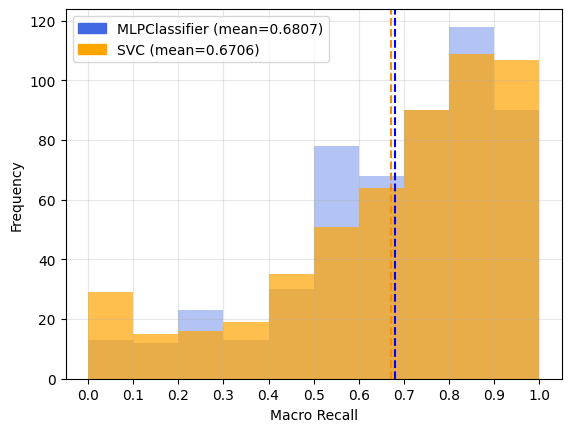

------------------------ MLPClassifier vs SVC on Recall ------------------------
t-Student: 1.662318
p-value: 0.097036

********************************************************************************



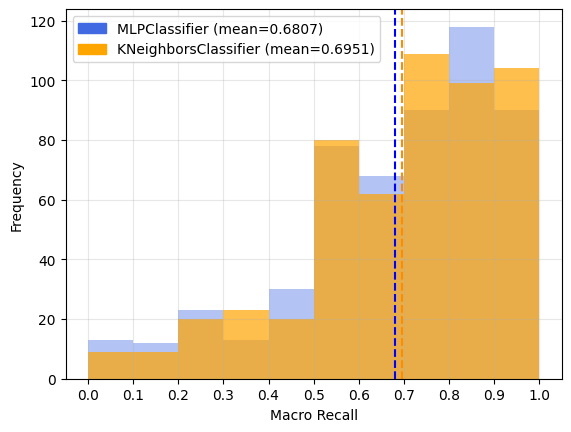

--------------- MLPClassifier vs KNeighborsClassifier on Recall ----------------
t-Student: -5.225434
p-value: 0.000000

********************************************************************************



In [11]:
for model_name1 in models_to_compare:
    for model_name2 in models_to_compare:
        if model_name1 == model_name2:
            continue
        ttest_compare_models(model_name1, model_name2, metric_colname="Recall", average="macro")
        print("\n" + "*"*80 + "\n")

## Comparison on the basis of Macro **Precision** score

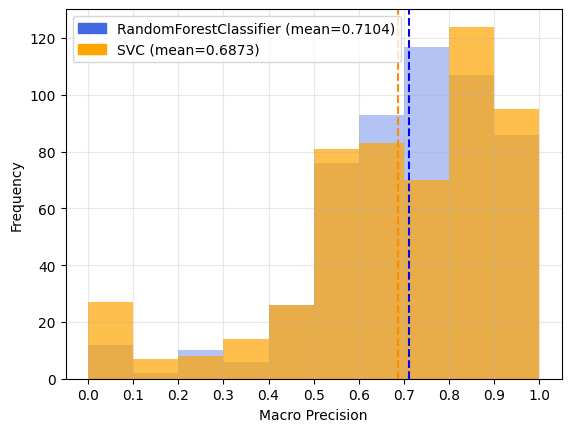

------------------ RandomForestClassifier vs SVC on Precision ------------------
t-Student: 5.049294
p-value: 0.000001

********************************************************************************



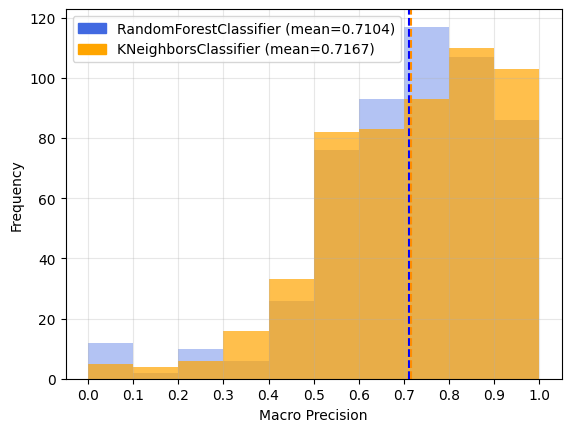

--------- RandomForestClassifier vs KNeighborsClassifier on Precision ----------
t-Student: -0.009862
p-value: 0.992135

********************************************************************************



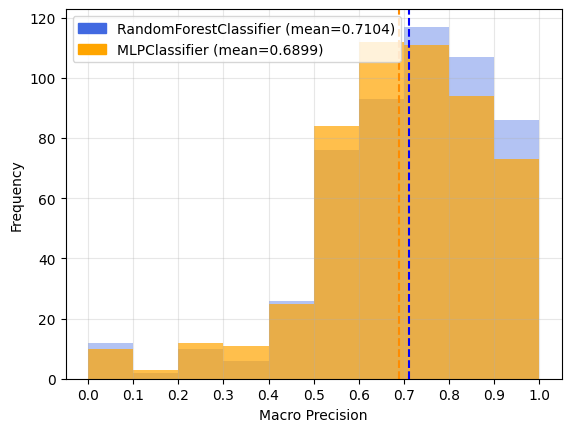

------------- RandomForestClassifier vs MLPClassifier on Precision -------------
t-Student: 4.733441
p-value: 0.000003

********************************************************************************



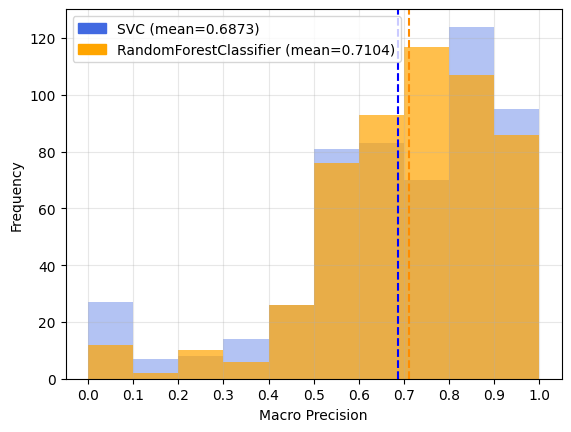

------------------ SVC vs RandomForestClassifier on Precision ------------------
t-Student: -5.049294
p-value: 0.000001

********************************************************************************



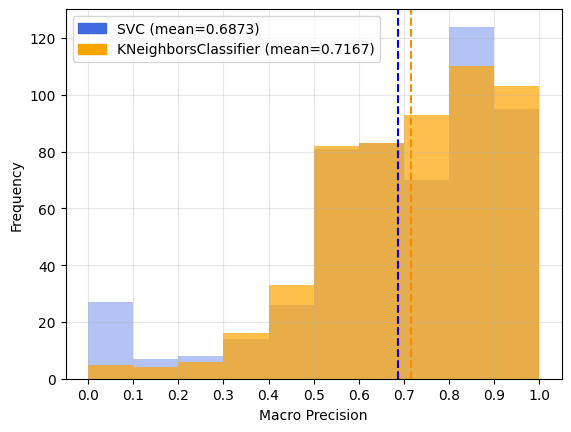

------------------- SVC vs KNeighborsClassifier on Precision -------------------
t-Student: -5.614980
p-value: 0.000000

********************************************************************************



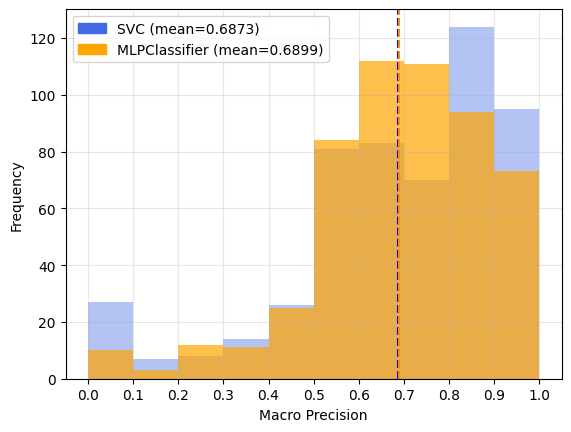

---------------------- SVC vs MLPClassifier on Precision -----------------------
t-Student: -1.662318
p-value: 0.097036

********************************************************************************



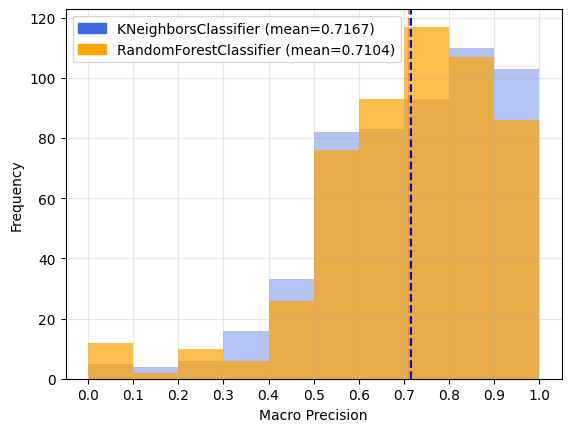

--------- KNeighborsClassifier vs RandomForestClassifier on Precision ----------
t-Student: 0.009862
p-value: 0.992135

********************************************************************************



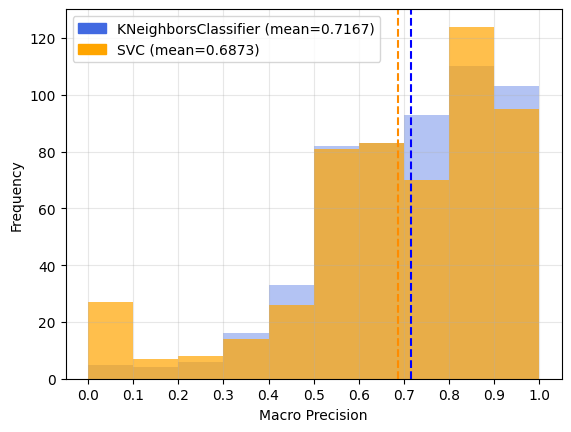

------------------- KNeighborsClassifier vs SVC on Precision -------------------
t-Student: 5.614980
p-value: 0.000000

********************************************************************************



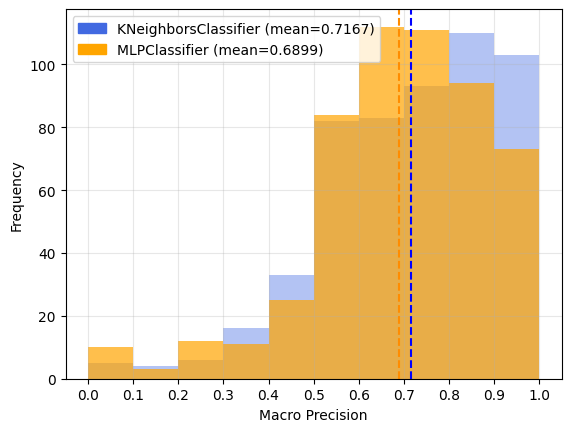

-------------- KNeighborsClassifier vs MLPClassifier on Precision --------------
t-Student: 5.225434
p-value: 0.000000

********************************************************************************



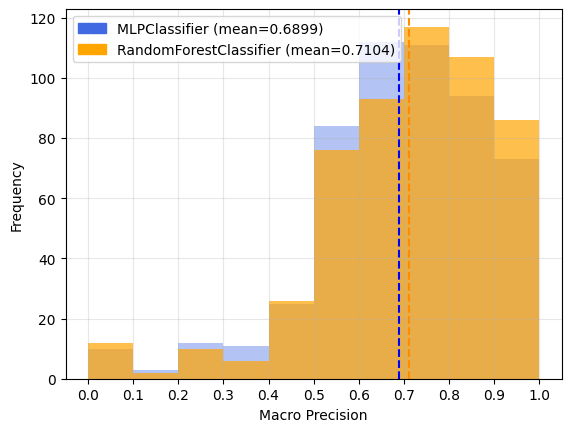

------------- MLPClassifier vs RandomForestClassifier on Precision -------------
t-Student: -4.733441
p-value: 0.000003

********************************************************************************



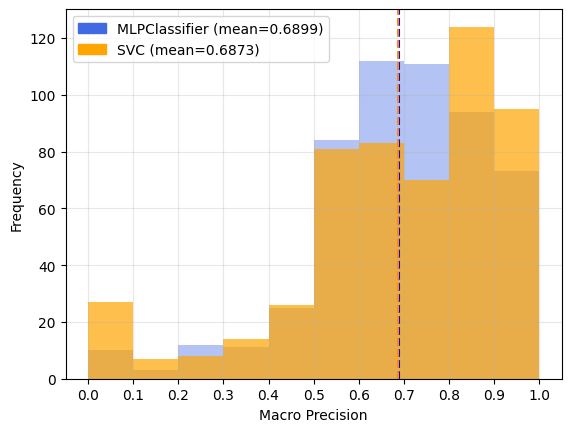

---------------------- MLPClassifier vs SVC on Precision -----------------------
t-Student: 1.662318
p-value: 0.097036

********************************************************************************



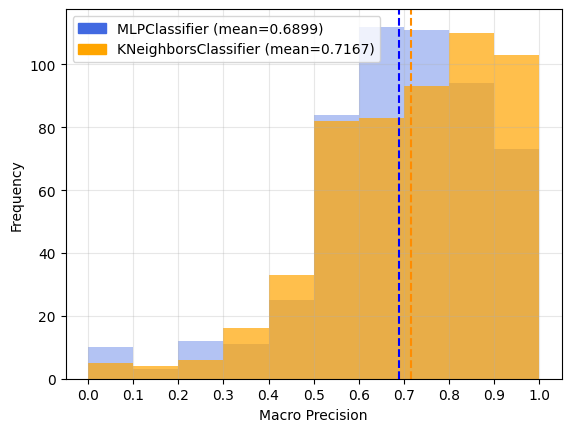

-------------- MLPClassifier vs KNeighborsClassifier on Precision --------------
t-Student: -5.225434
p-value: 0.000000

********************************************************************************



In [12]:
for model_name1 in models_to_compare:
    for model_name2 in models_to_compare:
        if model_name1 == model_name2:
            continue
        ttest_compare_models(model_name1, model_name2, metric_colname="Precision", average="macro")
        print("\n" + "*"*80 + "\n")